Saving retail_sales_dataset.csv to retail_sales_dataset (8).csv


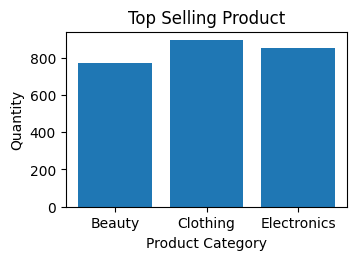

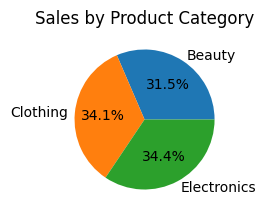

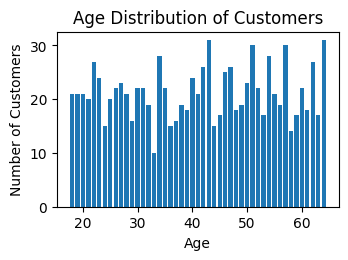

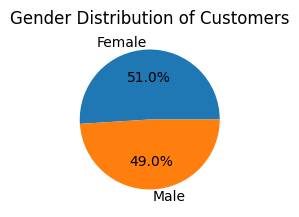

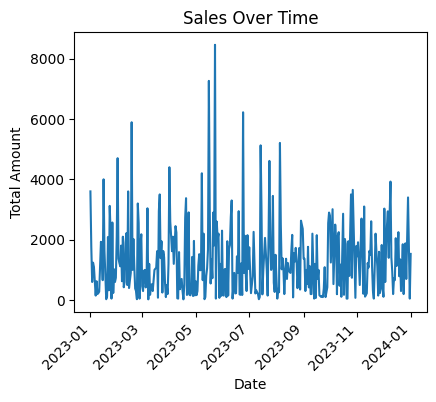

<ipython-input-11-dc12b0580439>:66: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_spend_by_age = df.groupby('Age')['Total Amount'].mean().reset_index()


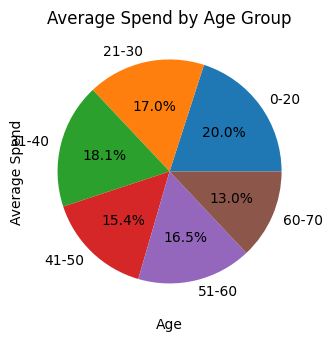

In [11]:
from google.colab import files
uploaded = files.upload()

#import libraries
import pandas as pd
import matplotlib.pyplot as plt

#load csv file
df = pd.read_csv('retail_sales_dataset.csv')

#preview data
df.head()

#top selling product
top_product = df.groupby('Product Category')['Quantity'].sum().reset_index()
plt.figure(figsize=(8,5))
plt.subplot(2,2,1)
plt.bar(top_product['Product Category'] ,top_product['Quantity'])
plt.ylabel('Quantity')
plt.xlabel('Product Category')
plt.title('Top Selling Product')
plt.show()

#sales by product category
sales_by_category = df.groupby('Product Category')['Total Amount'].sum().reset_index()
plt.figure(figsize=(8,5))
plt.subplot(2,2,2)
plt.pie(sales_by_category['Total Amount'], labels=sales_by_category['Product Category'], autopct='%1.1f%%')
plt.title('Sales by Product Category')
plt.show()

#age distribution of customers
age_distribution = df.groupby('Age')['Customer ID'].nunique().reset_index()
plt.figure(figsize=(8,5))
plt.subplot(2,2,3)
plt.bar(age_distribution['Age'], age_distribution['Customer ID'])
plt.ylabel('Number of Customers')
plt.xlabel('Age')
plt.title('Age Distribution of Customers')
plt.show()

#gender distribution of customers
gender_distribution = df.groupby('Gender')['Customer ID'].nunique().reset_index()
plt.figure(figsize=(8,5))
plt.subplot(2,2,4)
plt.pie(gender_distribution['Customer ID'], labels=gender_distribution['Gender'], autopct='%1.1f%%')
plt.title('Gender Distribution of Customers')
plt.show()

#sales over time
df['Date'] = pd.to_datetime(df['Date'])
sales_over_time = df.groupby('Date')['Total Amount'].sum().reset_index()
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.plot(sales_over_time['Date'], sales_over_time['Total Amount'])
plt.xticks(rotation=45, ha = 'right')
plt.ylabel('Total Amount')
plt.xlabel('Date')
plt.title('Sales Over Time')
plt.show()

#average spend by age group
bins = [0,20,30,40,50,60,70]
labels = ['0-20','21-30','31-40','41-50','51-60','60-70']
df['Age'] = pd.cut(df['Age'], bins=bins, labels=labels)
average_spend_by_age = df.groupby('Age')['Total Amount'].mean().reset_index()
plt.figure(figsize=(10,8))
plt.subplot(2,2,2)
plt.pie(average_spend_by_age['Total Amount'], labels=average_spend_by_age['Age'], autopct='%1.1f%%')
plt.ylabel('Average Spend')
plt.xlabel('Age')
plt.title('Average Spend by Age Group')
plt.show()